In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import logging
import os

import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set background and fontsize
rc_params = {
    'pdf.fonttype': 42, # Make fonts editable in Adobe Illustrator
    'ps.fonttype': 42, # Make fonts editable in Adobe Illustrator
    'axes.labelcolor': '#222222',
    'axes.labelsize': 9,
    'text.color': '#222222',
    'font.sans-serif' : 'Helvetica',
    'text.usetex': False,
    'figure.figsize': (7.2, 4.45),
    'xtick.major.size': 0.00,
    'ytick.major.size': 0.00,
    'axes.labelpad': 0.1,
    }
sns.set(style='white', context='paper', rc=rc_params,
        font_scale=1.0)

# Make analysis reproducible
np.random.seed(0)

# Enable logging
logging.basicConfig(level=logging.INFO)

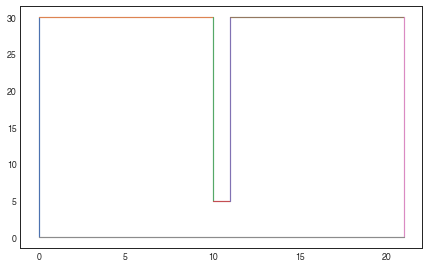

In [61]:
plt.plot(np.zeros((31,)), np.arange(31))
plt.plot(np.arange(11,), 30 * np.ones((11,)))
plt.plot(10 * np.ones((26,)), np.arange(30, 4, -1))
plt.plot(10 + np.arange(2,), 5 * np.ones((2,)))

plt.plot(11 * np.ones((26,)), np.arange(30, 4, -1))

plt.plot(11 + np.arange(11,), 30 * np.ones((11,)))
plt.plot(21 * np.ones((31,)), np.arange(31))
plt.plot(np.arange(22), np.zeros((22,)))

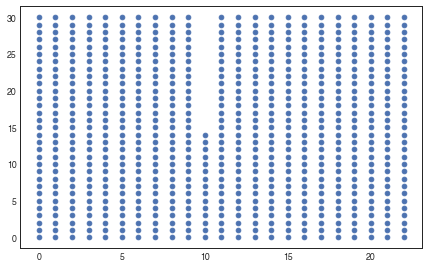

In [91]:
x, y = [], []
for col_ind in range(23):
    if col_ind != 10:
        x.append(col_ind * np.ones((31,)))
        y.append(np.arange(31))
    else:
        x.append(col_ind * np.ones((15,)))
        y.append(np.arange(15))
        
pos = np.stack((np.concatenate(x), np.concatenate(y)), axis=1)

plt.scatter(pos[:, 0], pos[:, 1])

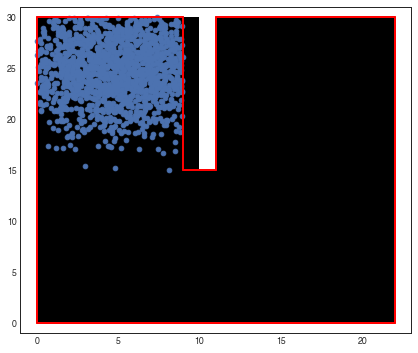

In [390]:
from replay_trajectory_classification.environments import Environment

x, y = [], []
for col_ind in range(23):
    if col_ind != 10:
        x.append(col_ind * np.ones((31,)))
        y.append(np.arange(31))
    else:
        x.append(col_ind * np.ones((15,)))
        y.append(np.arange(15))
        
pos = np.stack((np.concatenate(x), np.concatenate(y)), axis=1)
pos[680:700] = 0.0

environment = Environment(place_bin_size=1.0)
environment.fit_place_grid(pos)

spike_pos = np.random.multivariate_normal(
    mean=[5.0, 25.0],
    cov=[[10.0, 0.0],
         [0.0, 10.0]],
    size=2000
)
spike_pos = spike_pos[(spike_pos[:, 0] > 0) & (spike_pos[:, 0] < 9)]
spike_pos = spike_pos[(spike_pos[:, 1] > 0) & (spike_pos[:, 1] < 30)]

def draw_boundaries(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(np.zeros((31,)), np.arange(31), color='red', linewidth=2)
    ax.plot(np.arange(10,), 30 * np.ones((10,)), color='red', linewidth=2)
    ax.plot(9 * np.ones((16,)), np.arange(30, 14, -1), color='red', linewidth=2)
    ax.plot(9 + np.arange(3,), 15 * np.ones((3,)), color='red', linewidth=2)
    ax.plot(11 * np.ones((16,)), np.arange(30, 14, -1), color='red', linewidth=2)
    ax.plot(11 + np.arange(12,), 30 * np.ones((12,)), color='red', linewidth=2)
    ax.plot(22 * np.ones((31,)), np.arange(31), color='red', linewidth=2)
    ax.plot(np.arange(23), np.zeros((23,)), color='red', linewidth=2)

plt.figure(figsize=(7, 6))
plt.pcolormesh(environment.edges_[0],
               environment.edges_[1],
               environment.is_track_interior_.T,
               cmap='bone_r'
              )

plt.scatter(spike_pos[:, 0], spike_pos[:, 1])
# plt.scatter(pos[:, 0], pos[:, 1])
draw_boundaries(ax=None)

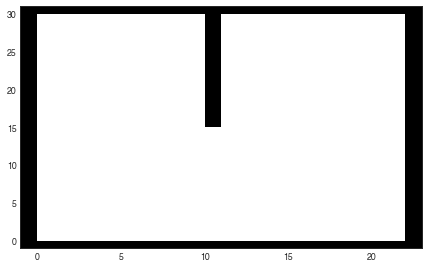

In [418]:
from scipy.ndimage.morphology import binary_dilation

k = np.zeros((3,3),dtype=int); k[1] = 1; k[:,1] = 1

out = binary_dilation(environment.is_track_interior_==0, k) & environment.is_track_interior_

from scipy.ndimage.morphology import binary_erosion

out = ~environment.is_track_interior_.astype(int) - binary_erosion(~environment.is_track_interior_.astype(int), k)

plt.pcolormesh(environment.edges_[0],
               environment.edges_[1],
               (out > -3).T,
               cmap='bone_r'
              )
# plt.scatter(pos[:, 0], pos[:, 1], color='red')

In [412]:
out

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
        -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1],
       [-1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
        -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1],
       [-1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
        -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1],
       [-1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
        -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1],
       [-1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
        -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -1],
       [-1, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
        -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3

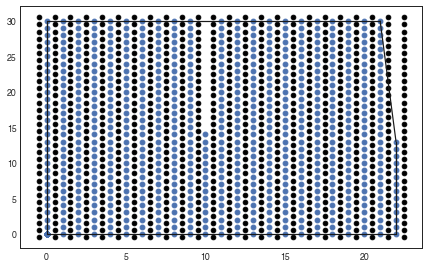

In [403]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d, Delaunay

hull = ConvexHull(pos)
plt.scatter(environment.place_bin_centers_[:, 0], environment.place_bin_centers_[:, 1], color='black')

plt.plot(pos[:,0], pos[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(pos[simplex, 0], pos[simplex, 1], 'k-')
    


In [393]:
ConvexHull?

Init signature: ConvexHull(points, incremental=False, qhull_options=None)
Docstring:     
ConvexHull(points, incremental=False, qhull_options=None)

Convex hulls in N dimensions.

.. versionadded:: 0.12.0

Parameters
----------
points : ndarray of floats, shape (npoints, ndim)
    Coordinates of points to construct a convex hull from
incremental : bool, optional
    Allow adding new points incrementally. This takes up some additional
    resources.
qhull_options : str, optional
    Additional options to pass to Qhull. See Qhull manual
    for details. (Default: "Qx" for ndim > 4 and "" otherwise)
    Option "Qt" is always enabled.

Attributes
----------
points : ndarray of double, shape (npoints, ndim)
    Coordinates of input points.
vertices : ndarray of ints, shape (nvertices,)
    Indices of points forming the vertices of the convex hull.
    For 2-D convex hulls, the vertices are in counterclockwise order.
    For other dimensions, they are in input order.
simplices : ndarray of i

In [352]:
np.nonzero((pos[:, 0] == pos[:, 0].max()) & (pos[:, 1] == pos[:, 1].max()))

(array([696]),)

In [341]:
environment.is_track_interior_[-1, :] = False
environment.is_track_interior_[:, -1] = False

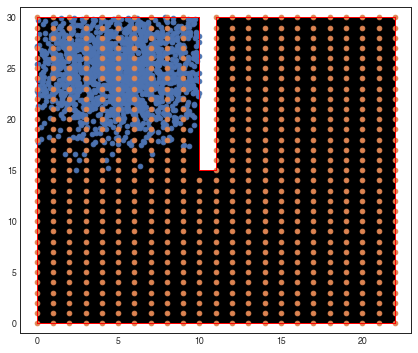

In [342]:
plt.figure(figsize=(7, 6))
plt.pcolormesh(environment.edges_[0],
               environment.edges_[1],
               environment.is_track_interior_.T,
               cmap='bone_r'
              )

plt.scatter(spike_pos[:, 0], spike_pos[:, 1])
plt.scatter(pos[:, 0], pos[:, 1])
draw_boundaries(ax=None)

In [285]:
bin_counts, edges = np.histogramdd(pos, bins=environment.edges_)
bin_counts

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [280]:
environment.edges_[0]

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

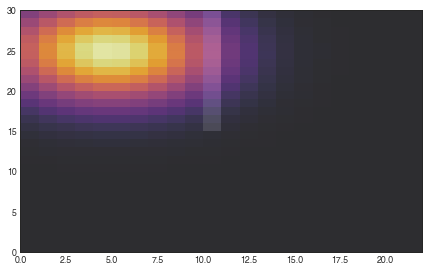

In [132]:
from replay_trajectory_classification.likelihoods.multiunit_likelihood_integer import estimate_position_density

pdf = estimate_position_density(
    environment.place_bin_centers_,
    spike_pos,
    np.sqrt(10.0)
)

plt.pcolormesh(
    environment.edges_[0],
    environment.edges_[1],
    environment.is_track_interior_.T,
    cmap='bone_r',
    zorder=2,
    alpha=0.1
)

plt.pcolormesh(
    environment.edges_[0],
    environment.edges_[1],
    pdf.reshape(environment.centers_shape_),
    cmap='inferno',
    alpha=0.8
)


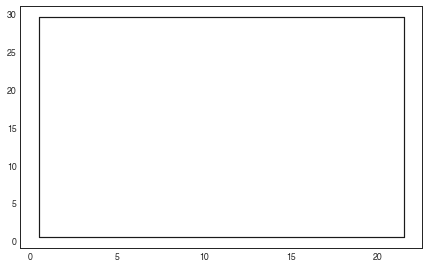

In [215]:
from scipy.spatial import ConvexHull

hull = ConvexHull(environment.place_bin_centers_)

for simplex in hull.simplices:
    plt.plot(environment.place_bin_centers_[simplex, 0], environment.place_bin_centers_[simplex, 1], 'k-')

In [218]:
reshaped_pdf = pdf.reshape(environment.centers_shape_)

reshaped_pdf

array([[3.189e-10, 4.410e-10, 5.587e-10, 6.489e-10, 6.920e-10, 6.793e-10,
        6.162e-10, 5.192e-10, 4.085e-10, 3.020e-10, 2.108e-10, 1.392e-10,
        8.695e-11, 5.117e-11, 2.823e-11, 1.450e-11, 6.900e-12, 3.024e-12,
        1.215e-12, 4.466e-13, 1.497e-13, 4.573e-14],
       [1.396e-09, 1.922e-09, 2.430e-09, 2.820e-09, 3.012e-09, 2.966e-09,
        2.704e-09, 2.294e-09, 1.821e-09, 1.360e-09, 9.583e-10, 6.389e-10,
        4.023e-10, 2.383e-10, 1.321e-10, 6.811e-11, 3.248e-11, 1.425e-11,
        5.736e-12, 2.110e-12, 7.081e-13, 2.164e-13],
       [5.605e-09, 7.680e-09, 9.679e-09, 1.123e-08, 1.200e-08, 1.186e-08,
        1.087e-08, 9.286e-09, 7.435e-09, 5.603e-09, 3.987e-09, 2.682e-09,
        1.701e-09, 1.014e-09, 5.642e-10, 2.917e-10, 1.393e-10, 6.123e-11,
        2.466e-11, 9.079e-12, 3.049e-12, 9.328e-13],
       [2.068e-08, 2.819e-08, 3.540e-08, 4.101e-08, 4.388e-08, 4.349e-08,
        4.008e-08, 3.448e-08, 2.784e-08, 2.117e-08, 1.520e-08, 1.031e-08,
        6.580e-09, 3.940e-0

In [201]:
def laplacian(Z, dx):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

laplacian(pdf.reshape(environment.centers_shape_), 1).shape, environment.centers_shape_

((28, 20), (30, 22))

TypeError: Dimensions of C (28, 20) are incompatible with X (23) and/or Y (31); see help(pcolormesh)

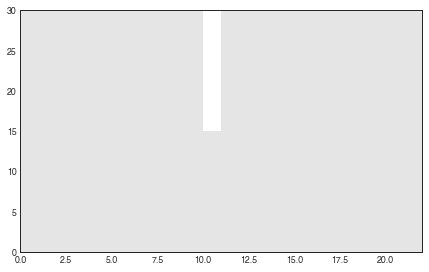

In [198]:
from replay_trajectory_classification.likelihoods.multiunit_likelihood_integer import estimate_position_density

pdf = estimate_position_density(
    environment.place_bin_centers_,
    spike_pos,
    np.sqrt(10.0)
)

plt.pcolormesh(
    environment.edges_[0],
    environment.edges_[1],
    environment.is_track_interior_.T,
    cmap='bone_r',
    zorder=2,
    alpha=0.1
)

plt.pcolormesh(
    environment.edges_[0],
    environment.edges_[1],
    laplacian(pdf.reshape(environment.centers_shape_), 1),
    cmap='inferno',
    alpha=0.8
)

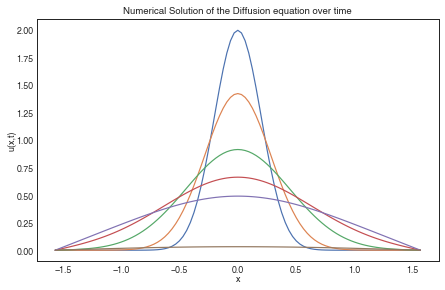

In [179]:
import matplotlib.pyplot as plt
import numpy as np

L = np.pi  # value chosen for the critical length
s = 101  # number of steps in x
t = 10002  # number of timesteps
ds = L / (s - 1)  # step in x
dt = 0.0001  # time step
D = 4  # diffusion constant, set equal to 1
C = 1  # creation rate of neutrons, set equal to 1
Alpha = (D * dt) / (ds * ds)  # constant for diffusion term
Beta = C * dt  # constant for u term

x = np.linspace(-L / 2, 0, num=51)
# setting x in the specified interval
x = np.concatenate([x, np.linspace(x[-1] - x[-2], L / 2, num=50)])

u = np.zeros(shape=(s, t))  # setting the function u
u[50, 0] = 1 / ds  # delta function
for k in range(0, t - 1):
    u[0, k] = 0  # boundary conditions
    u[s - 1, k] = 0
    for i in range(1, s - 1):
        u[i, k + 1] = (1 + Beta - 2 * Alpha) * u[i, k] + Alpha * \
            u[i + 1, k] + Alpha * u[i - 1, k]  # numerical solution
    if k == 50 or k == 100 or k == 250 or k == 500 or k == 1000 or k == 10000:  # plotting at times
        plt.plot(x, u[:, k])

plt.title('Numerical Solution of the Diffusion equation over time')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()

In [190]:
dx = np.diff(environment.edges_[0])[0]
gamma = alpha * dt / dx ** 2



NameError: name 'alpha' is not defined

In [203]:
# Set parameters.
nx = 128  # number of points in the x direction
ny = 128  # number of points in the y direction
Lx = 5.0  # domain length in the x direction
Ly = 5.0  # domain length in the y direction
dx = Lx / (nx - 1)  # grid spacing in x direction
dy = Ly / (ny - 1)  # grid spacing in y direction

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Set the initial conditions.
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

def laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Jacobi relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.
    """
    p = p0.copy()
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        p[1:-1, 1:-1] = 0.25 * (pn[1:-1, :-2] + pn[1:-1, 2:] +
                                pn[:-2, 1:-1] + pn[2:, 1:-1])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
        p[1:-1, -1] = 0.25 * (2.0 * pn[1:-1, -2] +
                              pn[2:, -1] + pn[:-2, -1])
        # Compute the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [204]:
# Compute the solution using Jacobi relaxation method.
p, ites, diff = laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-8)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(diff))


NameError: name 'l2_norm' is not defined

In [260]:
from replay_trajectory_classification.bins import atleast_2d, get_n_bins, get_centers

position = pos.copy()
bin_size = 2.5
position_range = None

position = atleast_2d(position)
is_nan = np.any(np.isnan(position), axis=1)
position = position[~is_nan]
n_bins = get_n_bins(position, bin_size, position_range)
_, edges = np.histogramdd(position, bins=n_bins, range=position_range)

mesh_edges = np.meshgrid(*edges)
place_bin_edges = np.stack([edge.ravel() for edge in mesh_edges], axis=1)

mesh_centers = np.meshgrid(
    *[get_centers(edge) for edge in edges])
place_bin_centers = np.stack(
    [center.ravel() for center in mesh_centers], axis=1)
centers_shape = mesh_centers[0].shape

In [256]:
np.diff(edges[0])[0]

2.4444444444444446

In [275]:
from replay_trajectory_classification.bins import get_grid

edges, place_bin_edges, place_bin_centers, centers_shape = get_grid(pos)

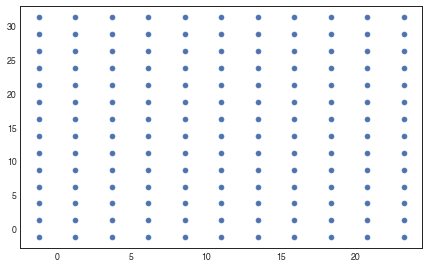

In [278]:
plt.scatter(place_bin_centers[:, 0], place_bin_centers[:, 1])

In [272]:

[np.insert(edge, (0, len(edge)), (edge[0] - np.diff(edge)[0],
                                  edge[-1] + np.diff(edge)[0]))
 for edge in edges]

[array([-2.444,  0.   ,  2.444,  4.889,  7.333,  9.778, 12.222, 14.667,
        17.111, 19.556, 22.   , 24.444]),
 array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5,
        25. , 27.5, 30. , 32.5])]

In [266]:
np.insert?

Signature: np.insert(arr, obj, values, axis=None)
Docstring:
Insert values along the given axis before the given indices.

Parameters
----------
arr : array_like
    Input array.
obj : int, slice or sequence of ints
    Object that defines the index or indices before which `values` is
    inserted.

    .. versionadded:: 1.8.0

    Support for multiple insertions when `obj` is a single scalar or a
    sequence with one element (similar to calling insert multiple
    times).
values : array_like
    Values to insert into `arr`. If the type of `values` is different
    from that of `arr`, `values` is converted to the type of `arr`.
    `values` should be shaped so that ``arr[...,obj,...] = values``
    is legal.
axis : int, optional
    Axis along which to insert `values`.  If `axis` is None then `arr`
    is flattened first.

Returns
-------
out : ndarray
    A copy of `arr` with `values` inserted.  Note that `insert`
    does not occur in-place: a new array is returned. If
    `axis` is

In [262]:
edges

[array([ 0.   ,  2.444,  4.889,  7.333,  9.778, 12.222, 14.667, 17.111,
        19.556, 22.   ]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
        27.5, 30. ])]

In [ ]:
try:
    # Sample is an ND-array.
    N, D = sample.shape
except (AttributeError, ValueError):
    # Sample is a sequence of 1D arrays.
    sample = np.atleast_2d(sample).T
    N, D = sample.shape

nbin = np.empty(D, int)
edges = D*[None]
dedges = D*[None]
if weights is not None:
    weights = np.asarray(weights)

try:
    M = len(bins)
    if M != D:
        raise ValueError(
            'The dimension of bins must be equal to the dimension of the '
            ' sample x.')
except TypeError:
    # bins is an integer
    bins = D*[bins]

# normalize the range argument
if range is None:
    range = (None,) * D
elif len(range) != D:
    raise ValueError('range argument must have one entry per dimension')

# Create edge arrays
for i in _range(D):
    if np.ndim(bins[i]) == 0:
        if bins[i] < 1:
            raise ValueError(
                '`bins[{}]` must be positive, when an integer'.format(i))
        smin, smax = _get_outer_edges(sample[:,i], range[i])
        try:
            n = operator.index(bins[i])

        except TypeError as e:
            raise TypeError(
                "`bins[{}]` must be an integer, when a scalar".format(i)
            ) from e

        edges[i] = np.linspace(smin, smax, n + 1)    
    elif np.ndim(bins[i]) == 1:
        edges[i] = np.asarray(bins[i])
        if np.any(edges[i][:-1] > edges[i][1:]):
            raise ValueError(
                '`bins[{}]` must be monotonically increasing, when an array'
                .format(i))
    else:
        raise ValueError(
            '`bins[{}]` must be a scalar or 1d array'.format(i))

    nbin[i] = len(edges[i]) + 1  # includes an outlier on each end
    dedges[i] = np.diff(edges[i])

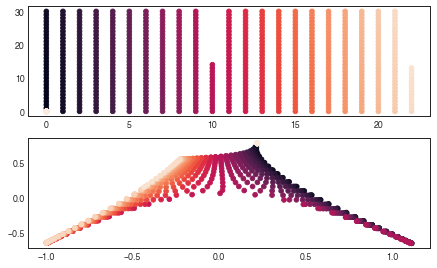

In [462]:
from pydiffmap.diffusion_map import DiffusionMap

diffusion_map = DiffusionMap.from_sklearn(
    n_evecs=2,
    epsilon='bgh',
    alpha=0.5,
    k=5,
    metric='euclidean')

transformed_pos = diffusion_map.fit_transform(pos)

fig, axes = plt.subplots(2, 1)
axes[0].scatter(pos[:, 0], pos[:, 1], c=np.arange(pos.shape[0]))
axes[1].scatter(transformed_pos[:, 0], transformed_pos[:, 1], c=np.arange(transformed_pos.shape[0]))

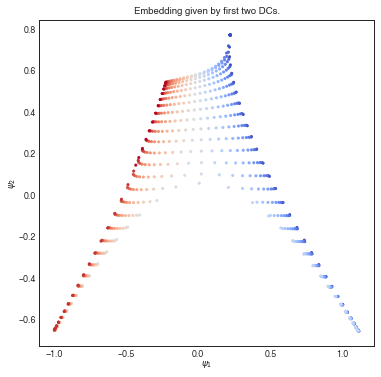

In [463]:
from pydiffmap.visualization import embedding_plot

embedding_plot(diffusion_map, scatter_kwargs={'c': pos[:,0], 's': 5, 'cmap': 'coolwarm'});

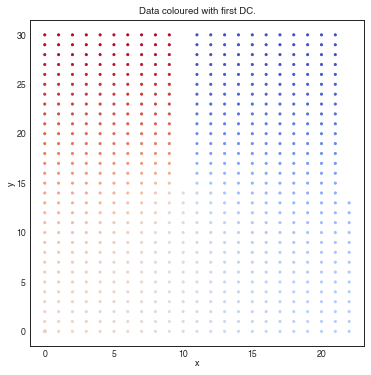

In [464]:
from pydiffmap.visualization import data_plot

data_plot(diffusion_map, scatter_kwargs={'s': 5, 'cmap': 'coolwarm'});

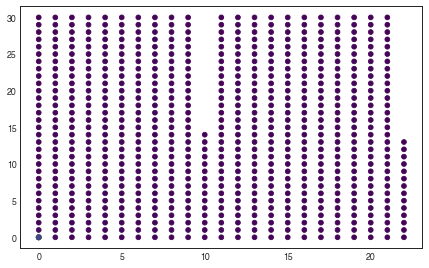

In [470]:
plt.scatter(pos[:, 0], pos[:, 1], c=diffusion_map.q, cmap='viridis')

In [3]:
from loren_frank_data_processing import Animal

ANIMALS = {
    'remy': Animal(
        directory='/Users/edeno/Documents/GitHub/anna_data/Raw-Data/remy/', short_name='remy'),
}

In [4]:
from loren_frank_data_processing.position import (_calulcate_linear_position,
                                                  _get_pos_dataframe,
                                                  calculate_linear_velocity)

position_info = _get_pos_dataframe(('remy', 20, 2), ANIMALS)
position_info

,x_position,y_position,head_direction,speed
time,,,,
0 days 00:22:41.849866667,154.080791,80.787413,-1.356825,11.750116
0 days 00:22:41.883485796,153.702850,80.981308,-1.519892,8.272126
0 days 00:22:41.917104926,153.468494,81.110560,-1.640285,5.408290
0 days 00:22:41.950724056,153.348330,81.185743,-1.708635,3.257905
0 days 00:22:41.984343186,153.312210,81.219000,-1.731001,1.573876
...,...,...,...,...
0 days 01:31:25.236136451,153.815815,80.449496,-0.610545,0.112995
0 days 01:31:25.269755581,153.819693,80.448679,-0.611524,0.136319
0 days 01:31:25.303374711,153.824655,80.448733,-0.612588,0.162954


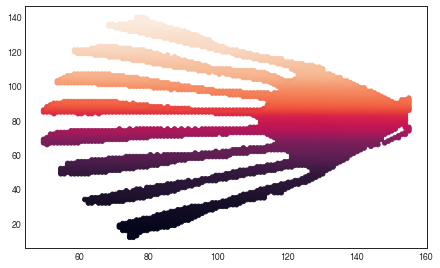

In [5]:
from pydiffmap.diffusion_map import DiffusionMap
import numpy as np
from replay_trajectory_classification.environments import Environment
import matplotlib.pyplot as plt

diffusion_map = DiffusionMap.from_sklearn(
    n_evecs=3,
    epsilon=1.0,
    alpha=0.1,
    k=5,
    metric='euclidean')

p = np.asarray(position_info[['x_position', 'y_position']])
env = Environment(place_bin_size=1.0)
env.fit_place_grid(p)
transformed_pos = diffusion_map.fit_transform(env.place_bin_centers_[env.is_track_interior_.ravel(order='F')])

plt.figure()
plt.scatter(env.place_bin_centers_[env.is_track_interior_.ravel(order='F'), 0], 
            env.place_bin_centers_[env.is_track_interior_.ravel(order='F'), 1],
            c=np.arange(env.is_track_interior_.sum()))


In [ ]:
%matplotlib widget

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(transformed_pos[:, 0], transformed_pos[:, 1], transformed_pos[:, 2],
           c=np.arange(transformed_pos.shape[0]))

In [7]:
dir(diffusion_map)

['L',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_generator',
 '_build_kernel',
 '_compute_weights',
 '_left_normalize',
 '_make_diffusion_coords',
 '_make_right_norm_vec',
 '_right_normalize',
 'alpha',
 'bandwidth_normalize',
 'construct_Lmat',
 'data',
 'density_fxn',
 'dmap',
 'epsilon_fitted',
 'evals',
 'evecs',
 'fit',
 'fit_transform',
 'from_sklearn',
 'kernel_matrix',
 'local_kernel',
 'n_evecs',
 'oos',
 'q',
 'right_norm_vec',
 'transform',
 'weight_fxn',
 'weights']

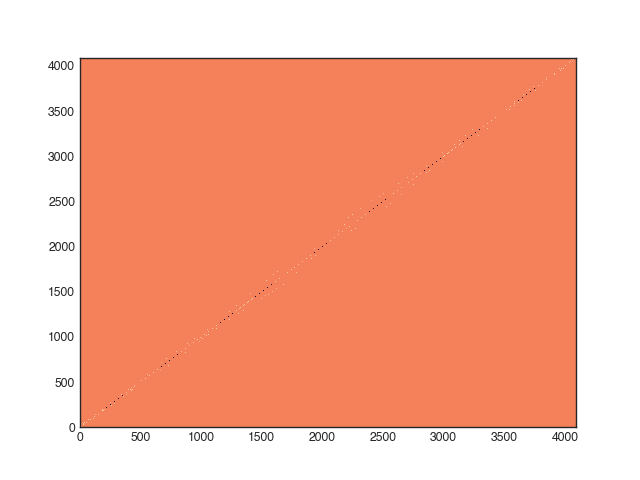

In [16]:
diffusion_map.L.toarray().T

In [ ]:
diffusion_map.L.toarray()

In [12]:
env.place_bin_centers_[env.is_track_interior_.ravel(order='F')].shape

(4092, 2)